['ï»¿Date', 'Weight', 'Image', 'Comment']
['4/1/2023', '8', '', 'First vet appointment']
['5/22/2023', '12', '', "No potty incidents inside in a week. He's potty trained"]
['6/5/2023', '14', '', 'Began Puppy Training classes last week.']
['7/5/2023', '19', '', 'First play date yesterday with Kiko.']
['8/1/2023', '23', '', 'Introduced chicken into his diet this last month.']
['8/20/2023', '29', '', '']
['9/1/2023', '30', '', 'Graduated Puppy class! ']
['9/22/2023', '32', '', 'Beginning Advanced classes!']
JPEG (640, 939) RGB


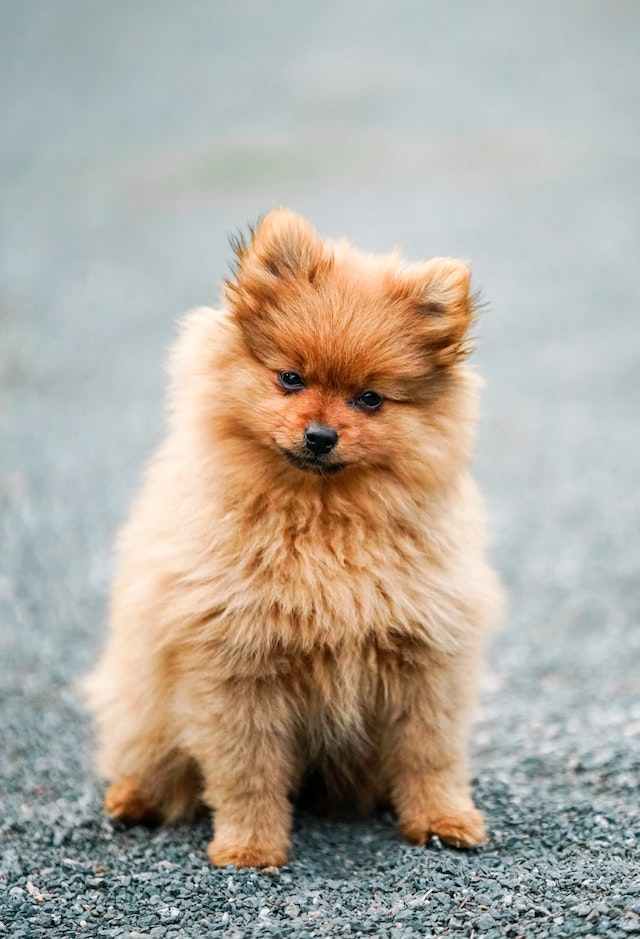

In [46]:
#!pip3 install pillow
import pandas as pd
from rapidfuzz import fuzz, process
from PIL import Image
import csv
# import dutton.csv and import PetRecord.csv

# read file
def load_file():
    with open('doc folder\dutton.csv', 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        for row in csv_reader:
            # Process each row here
            print(row)
    
#Adds new row to file for new pet weight record
def add_new_record(newPetObject, file):
    '''Information is entered by the user via keyboard and stores the new data in the csv file.
    For loop that will read through csv files and appends a new row. '''
    
#Adds a new pet to file.
def add_new_pet(PetID, file):
    '''Information is entered by the user via keyboard and stores the new data in the csv file.
    For loop that will read through csv files and appends a new row. '''

# Calculates age     
def getAge():
    '''Calculate the age based on all of the Date fields from the PetRecord.csv file and compares to the DOB field from the pets.csv file.'''

#Plots csv file into plotly
def plotcsv():
    '''Plots pet csv file based on PetID selected by user. '''
    
# Get Pet
def display_UI():
    '''Print values per the unique PetIDs to generate buttons.'''

# Returns all unique pets.
def Get_All_Unique_Pets(PetData):
    '''Loop through file and finds the uniqueID and adds to an array. Returns the array of IDs.'''
    
# Returns all unique pet's info per petID (petData).
def Get_All_Info_For_Pet(PetID, PetData):
    '''Returns array with all info pertaining to petID (Parsed specific to the unique PetID.)'''

#Returns every pet's record
def Get_All_Info_For_All_Pets():
    '''Call Get_All_Unique_Pets() function
    Call Get_All_Info_For_Pet() function'''

    
#Prints out Pet's Records
def print_record_for_individual(PetID):
    '''Call Get_All_Info_For_Pet(PetID, PetData)
    Prints pet profile based on PetID selected by user from csv.'''
    
#Allow updates to Profile.
def updatedogprofile(PetID, PetProfile):
    '''returns updated pet's profile'''

# gets dog's profile based on PetID.
def get_dogprofile(PetID, PetProfile):
    '''returns dog's profiles based on petID.'''

#loads image
def get_image():
    # load and show images
    img = Image.open('doc folder\dogimage.jpg')
    # image parameters
    print(img.format, img.size, img.mode)
    display(img) # in jupyter, the image is shown as output

load_file()
get_image()
